In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, preprocessing)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading in the train,test and sample data

In [3]:
dataset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv') 
sample = pd.read_csv('sample_submission.csv')

In [ ]:
dataset.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


Check the datasets for null values

In [ ]:
dataset.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
testset.isnull().sum()

userId     0
movieId    0
dtype: int64

Number of clusters K 

In [ ]:
dataset['rating'].nunique()

10

EDA

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [ ]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [ ]:
print(dataset['rating'].describe())

count    1.000004e+07
mean     3.533395e+00
std      1.061124e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


This distribution plot shows us that most moveis have a high rating, with this information I would recommend moveis with a rating lower than 3.0 be removed to save money and computation power.Not many people will miss the low rated movies.  

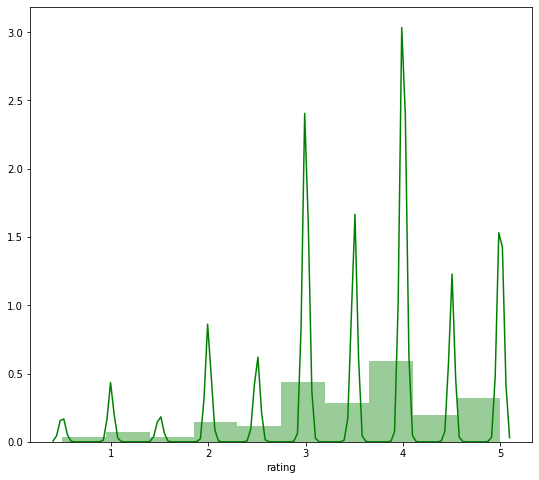

In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(dataset['rating'], color='g', bins=10, hist_kws={'alpha': 0.4});

Model Building

Isolating the rating column for predictive purposes

In [1]:
U = dataset.drop(['timestamp','userId','movieId'],axis = 1)
V = testset.drop('userId',axis=1)

NameError: ignored

The data is fit to the Kmeans model

In [ ]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit(U)
predictions = y_kmeans.predict(V)

Creating the submission dataset

In [ ]:
D = pd.DataFrame(predictions)
d = D.astype(float) #converting the desired column to a float

In [ ]:
S = sample.drop('rating',axis=1) # removing the submission data and substituting it with my own 

AttributeError: ignored

In [ ]:
 e = S.join(d, how='right')
 e.head()

,Id,0
0,1_2011,5.0
1,1_4144,5.0
2,1_5767,5.0
3,1_6711,5.0
4,1_7318,5.0


In [ ]:
e.set_index('Id', inplace=True)

KeyError: ignored

In [ ]:
e.rename(columns = {0:'rating'}, inplace = True)

In [ ]:
e.head()

,rating
Id,
1_2011,5.0
1_4144,5.0
1_5767,5.0
1_6711,5.0
1_7318,5.0


In [ ]:
e.to_csv('kag_prediction.csv') # saving the prediction 